# **Online Shoppers Purchasing Intention**


Aagam Shah: BS19BDS016

# Introduction





Problem statement:

In the 21st century, most individuals depend on and favour shopping through e-commerce sites. Even though a huge amount of time is spent browsing, the conversion rate into purchases is relatively low.

Objective:
The aim of this project is to identify the buyer behaviour patterns to effectively understand characteristics that have an impact on the sale.




In [ ]:
# importing libraries

# Pandas is a software library written for the Python programming language for data manipulation and analysis
import pandas as pd                    
# Python io module allows us to manage the file-related input and output operations
import io                              
# NumPy is a Python library used for working with arrays
import numpy as np                     
# Matplotlib.pyplot is a collection of functions that make matplotlib work
import matplotlib.pyplot as plt        
# Seaborn is a Python data visualization library based on matplotlib
import seaborn as sns                  

    
# Scipy.stats is used for obatianing probablistic distributions  
from scipy.stats import stats
from scipy.stats import shapiro, mannwhitneyu, chi2_contingency, levene


# Power transformer library
from sklearn.preprocessing import PowerTransformer

# library for standard scaler
"""package provides several common utility functions and transformer classes to change raw feature vectors into a representation 
that is more suitable for the downstream estimators"""
from sklearn.preprocessing import StandardScaler


#Sklearn.metrics module implements several loss, score, and utility functions to measure classification performance.
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve,auc 


from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import plot_roc_curve


NameError: ignored

# Data Description

Administrative: Number of different pages visited related to the administrative concerns of the website

Administrative Duration: Total amount of time (in seconds) spent by the visitor on account management related pages

Informational: Number of different pages visited related to the information of the website and other useful contents of the website

Informational Duration: Total amount of time (in seconds) spent by the visitor on informational pages

Product related: number of different pages visited related to different products of the website

Product related duration: Total amount of time (in seconds) spent by the visitor on product related pages

Bounce rate: Avaerage bounce rate value of the pages visited by the visitor

Exit rate: Avaerge exit rate value of the pages visited by the visitor

Page Value: Page value is the average value for a page that a user visited before making a transaction

Special Day: This feauture indicates the closeness of the site visiting time to a specific special day, eg. Valentines day

Brower: ID of browsers from which the sessions took place

Region: ID of regions from which the sessions took place

Traffic type: ID of different types of sources from which the users landed on the website

Visitor type: Type of the visitor shopping online

Weekend: Whether the session was on a weekend or not

Operating systems: Operating system of the visitor

Month: Month value of the visit date

Revenue: Whether the user contributed to the revenue by purchasing or not


In [ ]:
# Loading the dataset into a dataframe

df = pd.read_csv("/content/UCI_online_shoppers_intention.csv")
# df = pd.read_csv("online_shoppers_intention_UCI.csv")

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In this dataset we have 18 columns (attributes), 12330 rows (instances) and no missing values.

Each row represents one session.

In [ ]:
# Converting attributes into objects

df['OperatingSystems'] = df['OperatingSystems'].astype('object')
df['Browser'] = df['Browser'].astype('object')
df['Region'] = df['Region'].astype('object')
df['TrafficType'] = df['TrafficType'].astype('object')
df['Weekend'] = df['Weekend'].astype('object')
df['Revenue'] = df['Revenue'].astype('object')

In [ ]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems            object
Browser                     object
Region                      object
TrafficType                 object
VisitorType                 object
Weekend                     object
Revenue                     object
dtype: object

In [ ]:
# Printing the attributes which are objects

for i in df.select_dtypes(include='object').columns:
    print(i)
    print(df[i].unique())
    print()

Month
['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']

OperatingSystems
[1 2 4 3 7 6 8 5]

Browser
[1 2 3 4 5 6 7 10 8 9 12 13 11]

Region
[1 9 2 3 4 5 6 7 8]

TrafficType
[1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 18 19 16 17 20]

VisitorType
['Returning_Visitor' 'New_Visitor' 'Other']

Weekend
[False True]

Revenue
[False True]



In [ ]:
# Checking for negative values in the column ProductRelated_Duration

len(df.loc[df['ProductRelated_Duration'] <=-1, 'ProductRelated_Duration'])

0

In [ ]:
# Checking for negative values in the column Informational_Duration

len(df.loc[df['Informational_Duration'] <= -1, 'Informational_Duration'])

0

In [ ]:
# Checking for negative values in the column Administrative_Duration

len(df.loc[df['Administrative_Duration'] <= -1, 'Administrative_Duration'])

0

# Data Exploration

##Data Visualization

In [ ]:
# Selecting numeric columns
numerical = df.select_dtypes(include=np.number)

# Selecting categorical columns
categorical = df.select_dtypes(exclude=np.number)

# List of categorical variables
cat = [i for i in df.columns if df[i].dtypes == 'O']

# List of numerical variables
num = [i for i in df.columns if i not in categorical]
print('categorical:', cat, '\n\nnumerical: ', num)


categorical: ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue'] 

numerical:  ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']


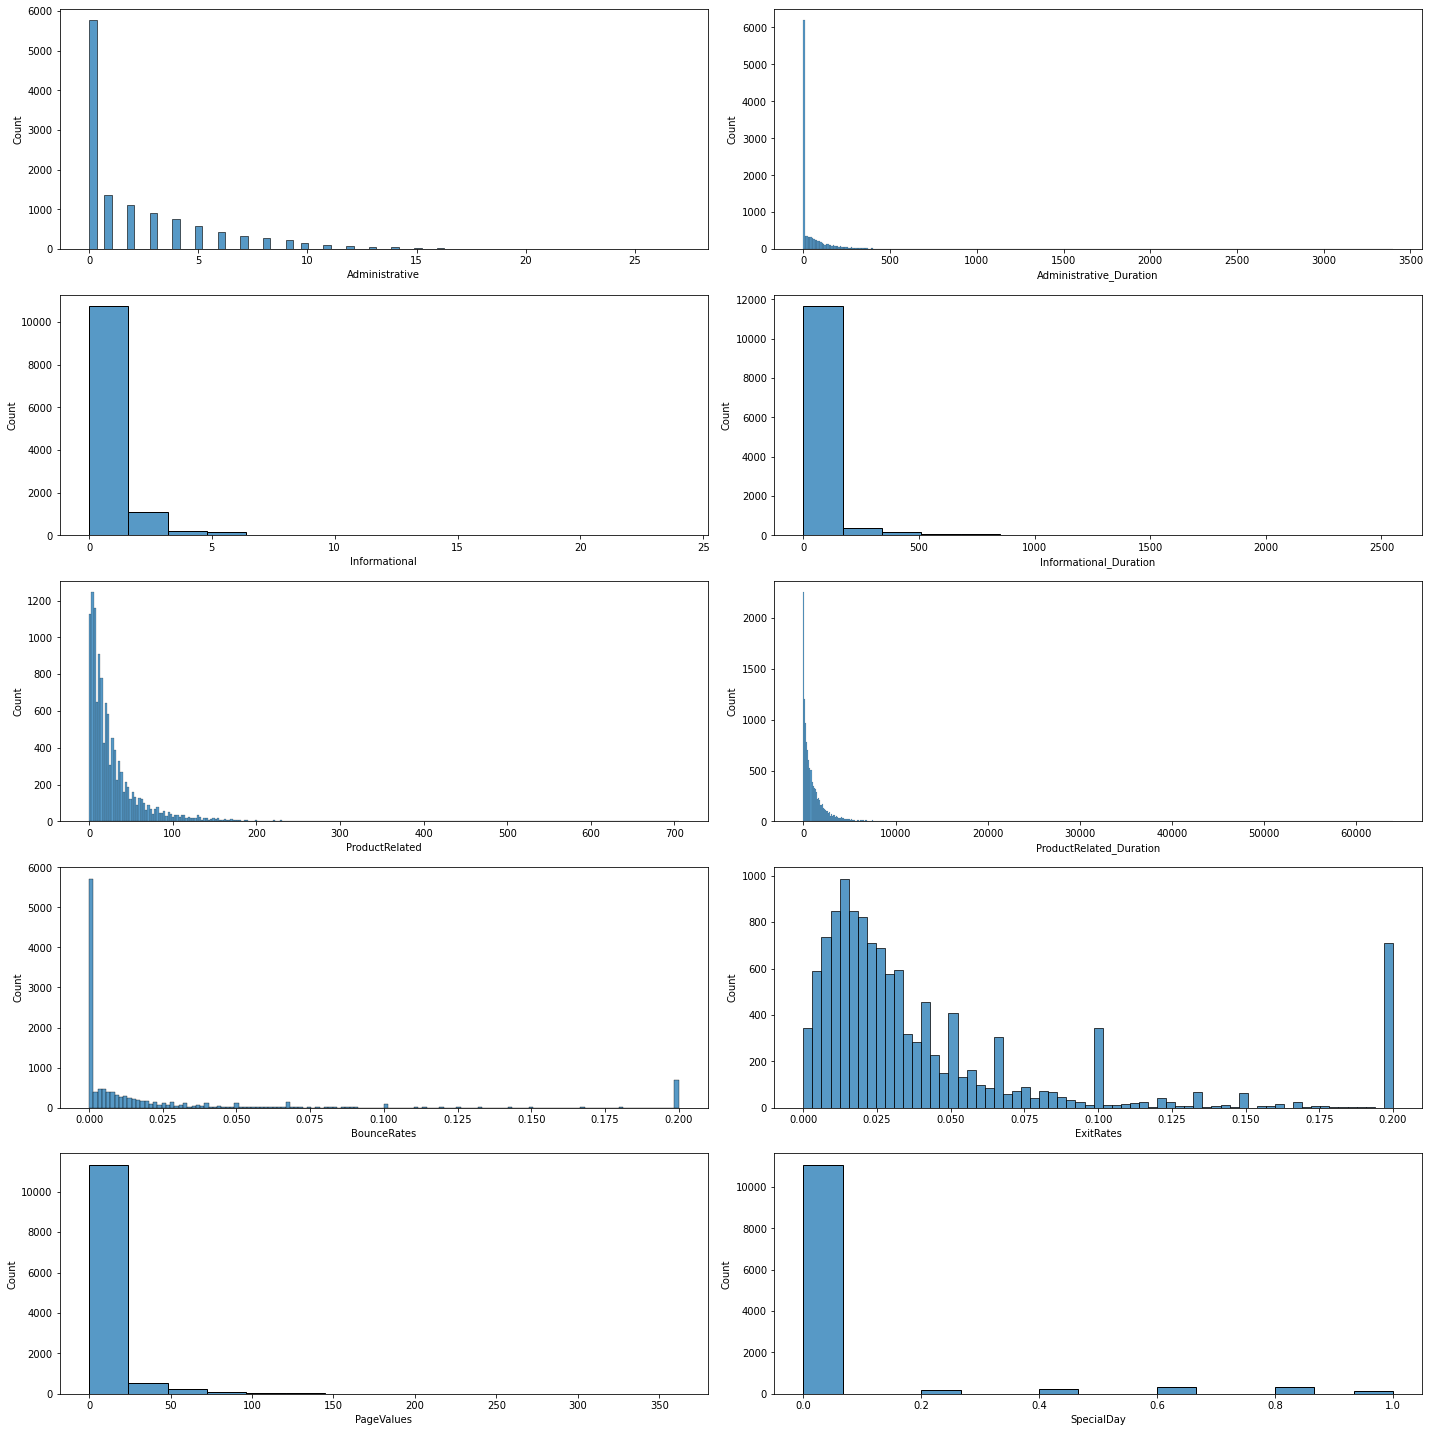

In [ ]:
# Plotting the count of numeric variables

fig, axes =plt.subplots(5,2, figsize=(20,20), sharex=False)
axes = axes.flatten()

for ax, i in zip(axes, numerical.columns):
    sns.histplot(data=df, x=i, ax=ax)

plt.tight_layout()  
plt.show()


The customers visiting the site did not view many pages relating to administrative concerns, and the customers who did visit administrative pages did not spend a lot of time looking through them.

Informational pages that were visited by customers have a low count and less time was spent on those pages.

Customers visited more product related pages and spend more time doing so.

The bounce rate shows the percentage of visitors who entered the site and then left it rather than viewing other pages within the site.

A high number of visitors left the site as soon as opening it, thus showing a high percentage of exit rates.


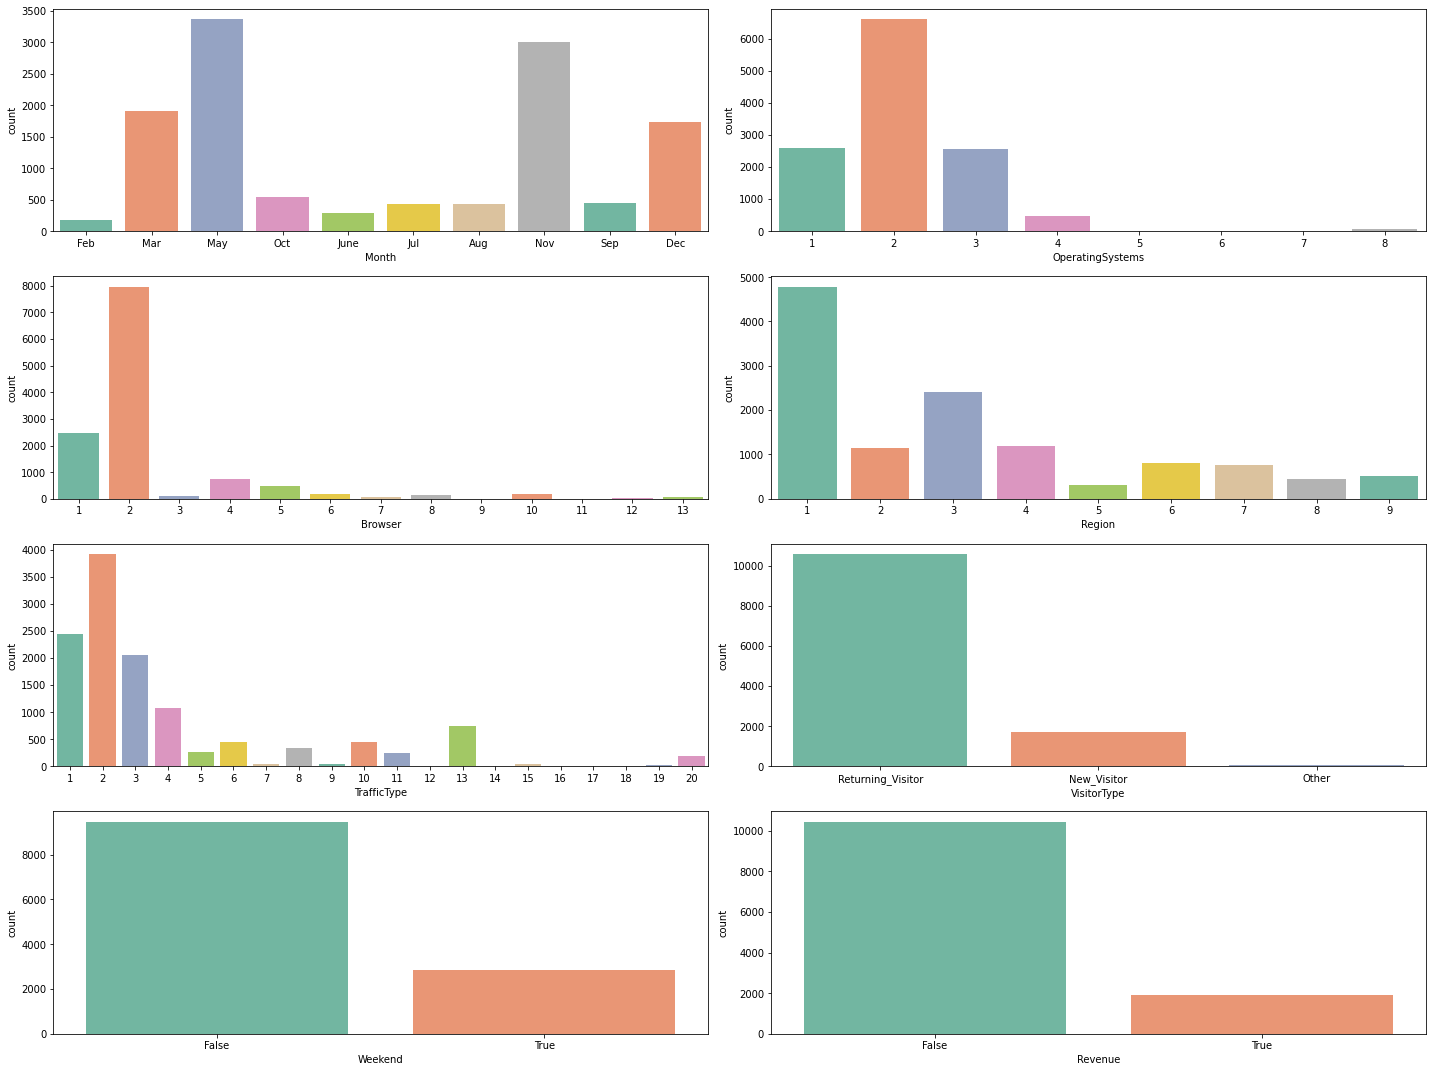

In [ ]:
# Plotting the count of each categorical variable 

fig, axes =plt.subplots(4,2, figsize=(20,15), sharex=False)
axes = axes.flatten()

for ax, i in zip(axes, categorical.columns):
    sns.countplot(x=i, data=df, ax=ax, palette="Set2")

plt.tight_layout()  
plt.show()

Months May and November have the maximum visit counts.

Visitors using Operating System 2 have the greatest count.

Visitors with the Brower ID as 2 has the highest number of visits.

There is an adequate reach in various regions ranging from Region ID 1 to 9, however Region ID 1 has the highest volume of visits.

Tyaffic Type ID 2 and 1, respectively produce higher amounts of visits.

There is a greater amount of visits from returning customers compared to new customers.

There were more visits during the week than the weekend.

Visitors browsing the site did not generate a great deal of revenue.


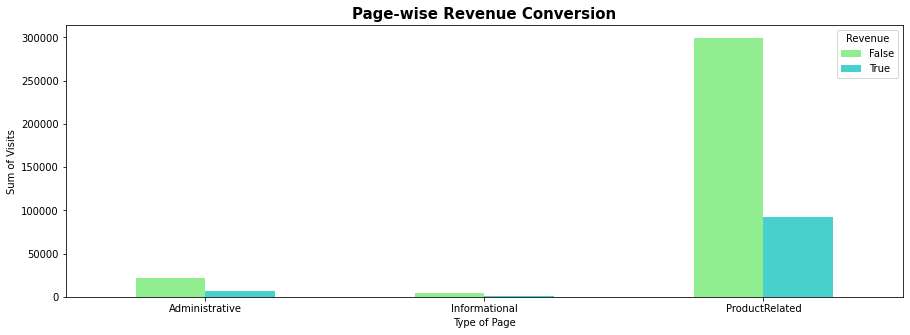

In [ ]:
# Plotting the sum of visits of each type of page with respect to revenue

pageWiseRevenue = pd.pivot_table(df,values=['Administrative','Informational','ProductRelated'],index='Revenue',aggfunc='sum')

pageWiseRevenue.T.plot(kind='bar',figsize=(15,5),color=['lightgreen', 'mediumturquoise'])
plt.title('Page-wise Revenue Conversion',fontweight='bold',size=15,color='black')
plt.xlabel('Type of Page')
plt.ylabel('Sum of Visits')
plt.xticks(rotation=0)
plt.show()


The graph above shows that a higher number of customers visited product related pages however they only generated an average amount of revenue, compared to the other pages, administrative and informational.

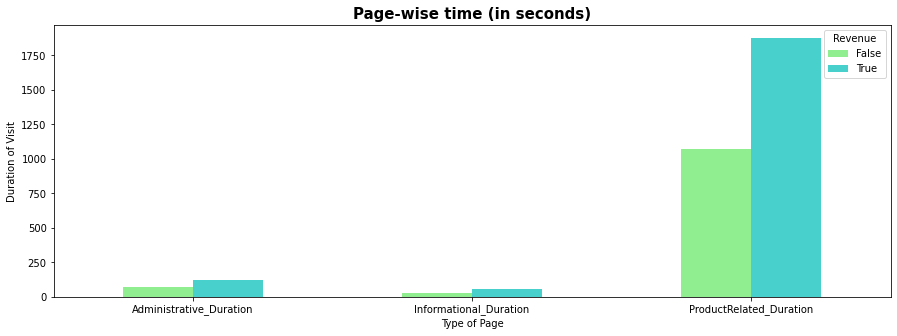

In [ ]:
# Plotting the duration of the visit of the type of page with respect to revenue

pageWiseRevenue_Duration = pd.pivot_table(df,values=['Administrative_Duration','Informational_Duration','ProductRelated_Duration'],index='Revenue')

pageWiseRevenue_Duration.T.plot(kind='bar',figsize=(15,5),color=['lightgreen', 'mediumturquoise'])
plt.title('Page-wise time (in seconds)',fontweight='bold',size=15,color='black')
plt.xlabel('Type of Page')
plt.ylabel('Duration of Visit')
plt.xticks(rotation=0)
plt.show()


The graph above shows that consumers who spend more time on each page generate a higher amount of revenue. 

More time the customer spends on a product related page, it is more likely that the customer will generate revenue.


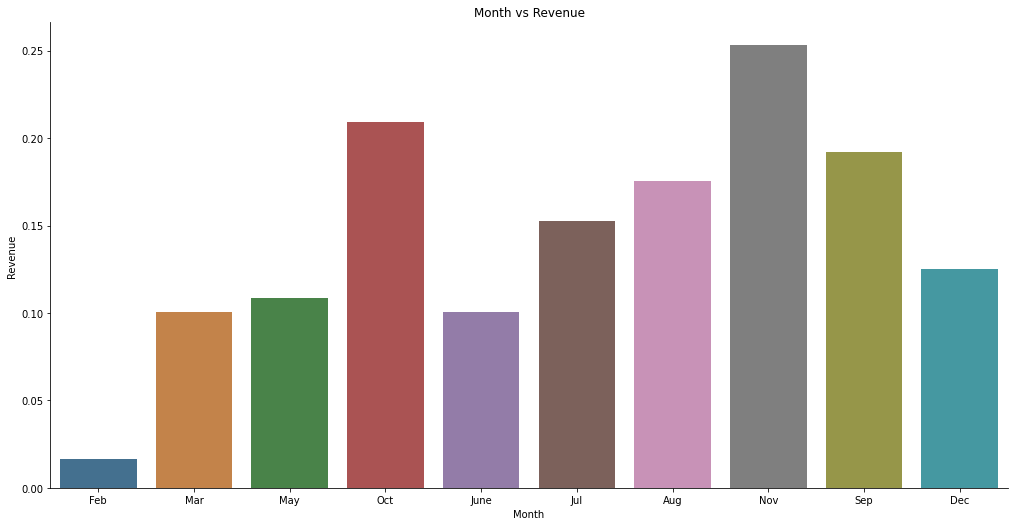

In [ ]:
# Month vs Revenue

sns.catplot(x="Month", y="Revenue",
                data=df, saturation=.5,
                kind="bar", ci= None, aspect=2, height=7)
plt.title('Month vs Revenue')
plt.show()

The graph above shows that the most revenue created is during the end of the year. (September, October, November)

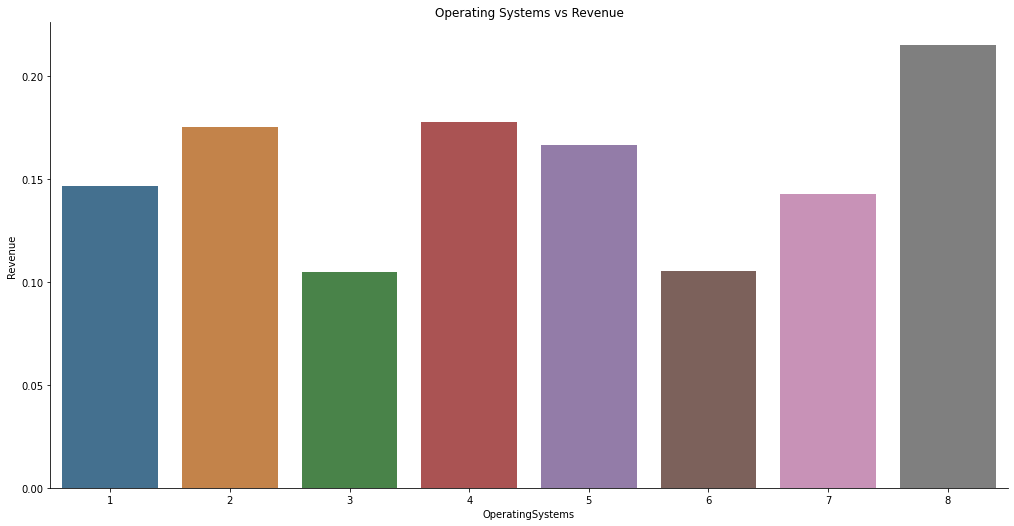

In [ ]:
# OperatingSystems vs Revenue

sns.catplot(x="OperatingSystems", y="Revenue",
                data=df, saturation=.5,
                kind="bar", ci= None, aspect=2, height=7)
plt.title('Operating Systems vs Revenue')
plt.show()

The graph above states that Operating System 8 generates the highest amount of revenue, followed by 4, 2, 5 and 7 respectively.
Opeerating System 3 generates the least revenue.

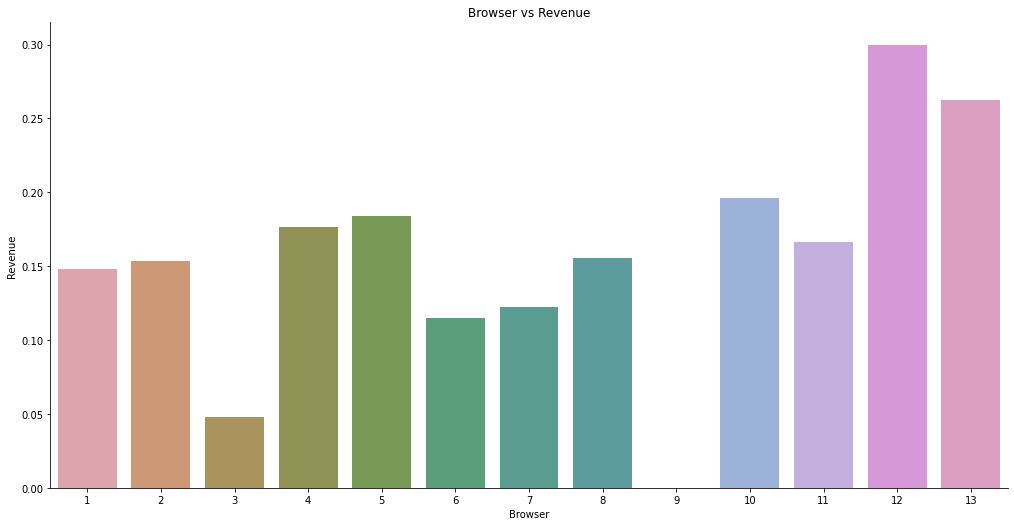

In [ ]:
# Browser vs Revenue

sns.catplot(x="Browser", y="Revenue",
                data=df, saturation=.5,
                kind="bar", ci= None, aspect=2, height=7)
plt.title('Browser vs Revenue')
plt.show()

The bar graph shows that Browser 12 and 13 generate the highest level of revenue.

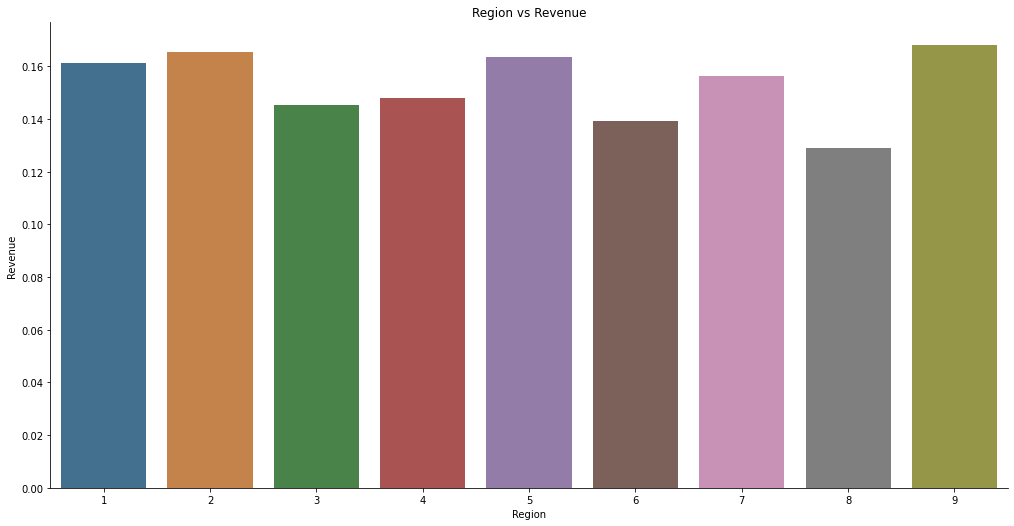

In [ ]:
# Region vs Revenue

sns.catplot(x="Region", y="Revenue",
                data=df, saturation=.5,
                kind="bar", ci= None, aspect=2, height=7)
plt.title('Region vs Revenue')
plt.show()

The graph aboves shows that all the regions ranging from 1 to 9, generate revenue.

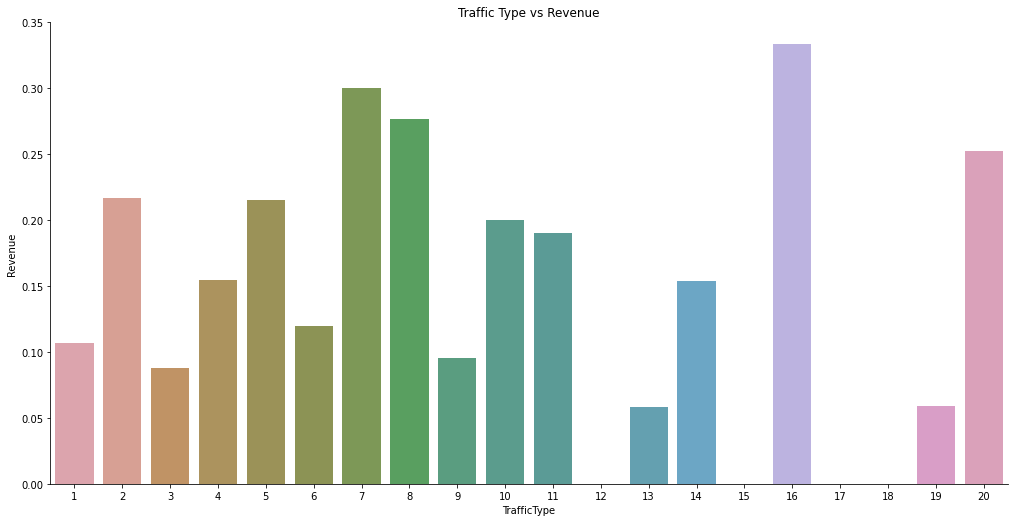

In [ ]:
# TrafficType vs Revenue

sns.catplot(x="TrafficType", y="Revenue",
                data=df, saturation=.5,
                kind="bar", ci= None, aspect=2, height=7)
plt.title('Traffic Type vs Revenue')
plt.show()

In the graph above, traffic type 16 creates the most revenue, while traffic type 13 and traffic type 19 create the least.

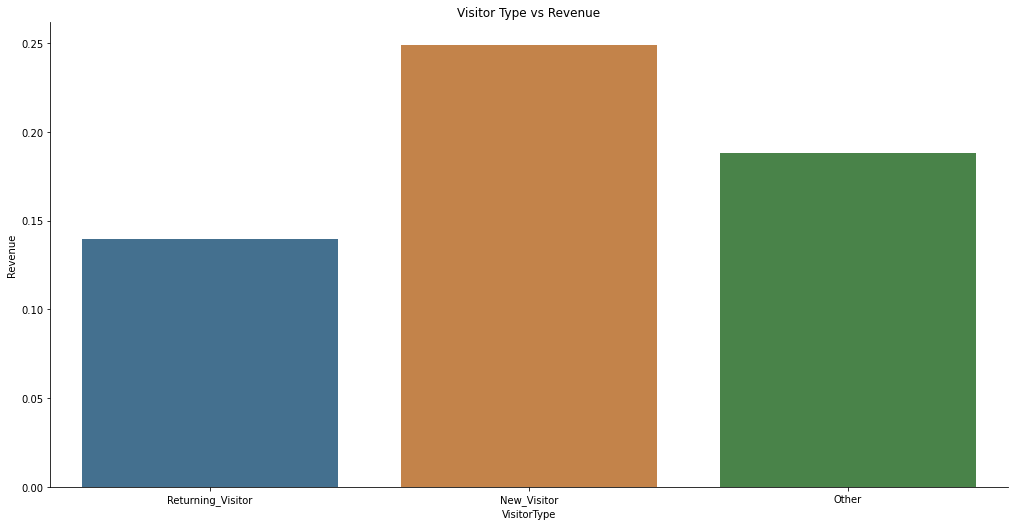

In [ ]:
# VisitorType vs Revenue

sns.catplot(x="VisitorType", y="Revenue",
                data=df, saturation=.5,
                kind="bar", ci= None, aspect=2, height=7)
plt.title('Visitor Type vs Revenue')
plt.show()

This graph shows that a new visitors generate the most revenue.

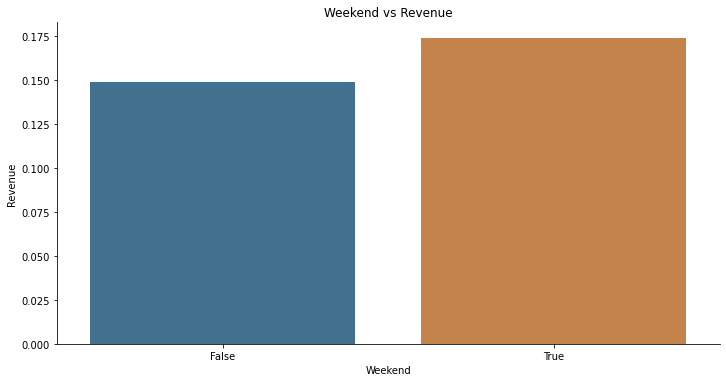

In [ ]:
# Weekend vs Revenue

sns.catplot(x="Weekend", y="Revenue",
                data=df, saturation=.5,
                kind="bar", ci= None, aspect=2, height=5)
plt.title('Weekend vs Revenue')
plt.show()


In the graph above we can see that customers shopping during the weekend create the highest amount of revenue compared to shopping during the week.

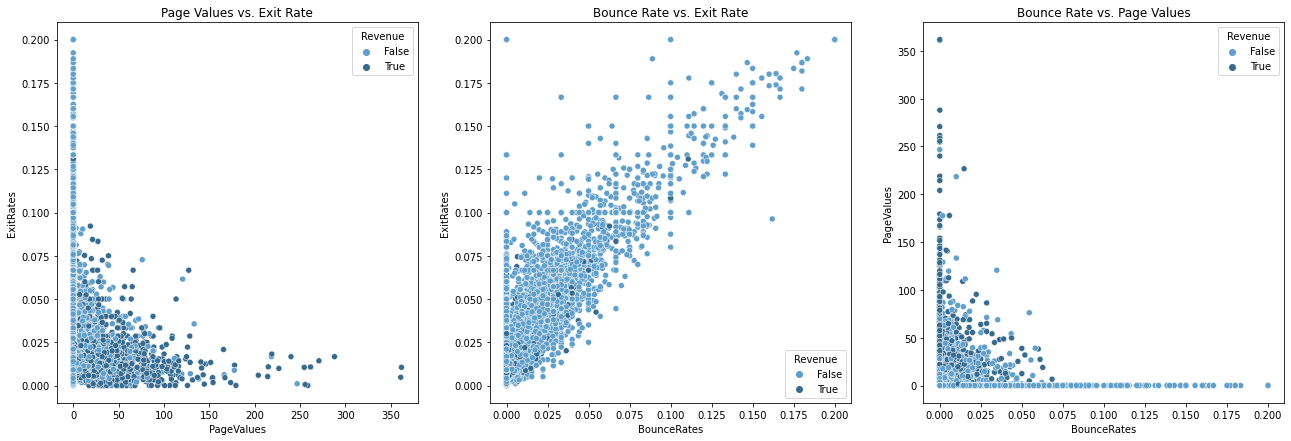

In [ ]:
# Comparing the three variables, page value, bounce rate and exit rate against each other

plt.figure(figsize=(22, 7))
plt.subplot(1,3,1)
sns.scatterplot(x= 'PageValues',y='ExitRates',data=df,hue='Revenue', palette='Blues_d')
plt.title('Page Values vs. Exit Rate')


plt.subplot(1,3, 2)
sns.scatterplot(x= 'BounceRates',y='ExitRates',data=df,hue='Revenue', palette='Blues_d')
plt.title('Bounce Rate vs. Exit Rate')


plt.subplot(1, 3, 3)
sns.scatterplot(x= 'BounceRates',y='PageValues',data=df,hue='Revenue', palette='Blues_d')
plt.title('Bounce Rate vs. Page Values')

plt.show()



Customers who ended up shopping or generating revenue (Dark Blue) have a relatively lower bounce rate and exit rate compared to customers who did not generate revenue (Light Blue).

Customers who ended up shopping have a page value on the higher side relative to the negative classes.

Customers with lower bounce rates and exit rates have shopped more, and customers who have shopped more have higher page values.

In [ ]:
df1 = pd.read_csv("/content/UCI_online_shoppers_intention.csv")
# df1 = pd.read_csv("online_shoppers_intention_UCI.csv")

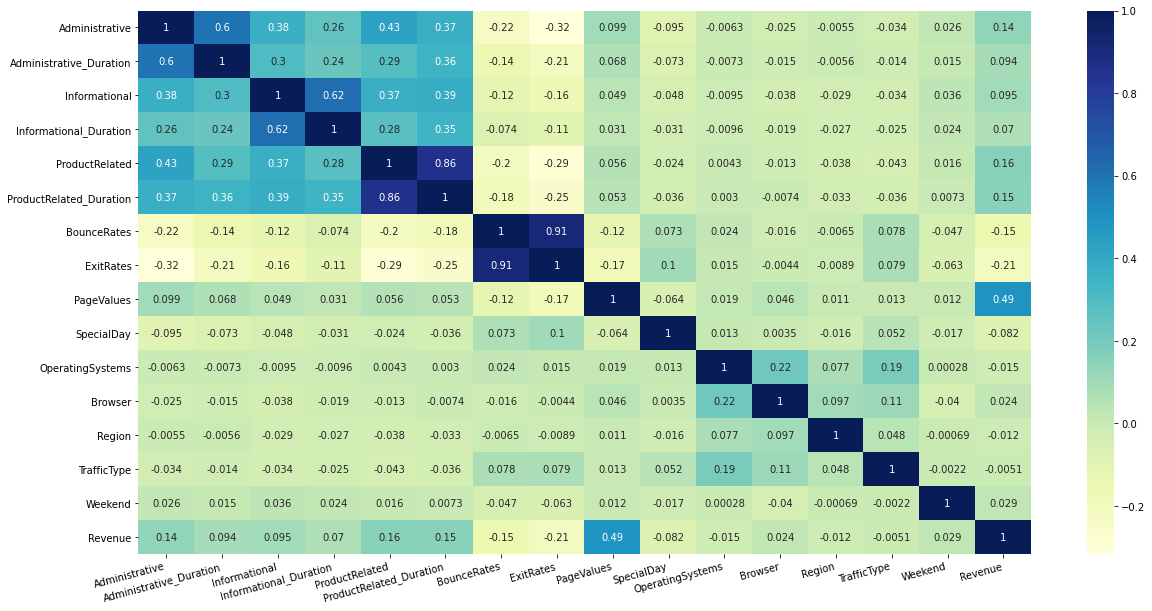

In [ ]:

# Correlation matrix

plt.figure(figsize=(20,10))
heatmap = sns.heatmap(df1.corr(),cmap="YlGnBu",annot=True) # center = 0
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=15,horizontalalignment='right');

 

From the coorelation matrix above, Bouce Rates and Exit Rates have the hightest coorelation with a value of 0.91.

Followed by Product_Related and ProductRelated_Duration with a value of 0.86.

## Statistical Analysis

In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


In [ ]:
# Two-Sample T-test
tcol = []
tpval = []
ts = []
for n in numerical.columns:
    tcol.append(n)
    # splitting into 2 groups(Revenue = True, Revenue = False)
    g1 = df[n][df['Revenue'] == False]
    g2 = df[n][df['Revenue'] == True]
    # Test for normality(Shapiro Test)
    # H0: Data is normal
    # H1: Data is not normal
    # if p < 0.05 --- reject Null Hypothesis
    for b in [g1]:
        s, p = shapiro(b)
    for c in [g2]:
        s1, p1 = shapiro(c)
    if p > 0.05 or p1 > 0.05:
        w, lp = levene(g1, g2)
    # If doesn't pass normality or variance test, we do non-parametric Test(mannwhitneyu Test)
    if p <= 0.05 or p1 <= 0.05 or lp <= 0.05:
        ms, mp = mannwhitneyu(g1, g2)
        tpval.append(round(mp, 4))
    if mp < 0.05:
        ts.append('*')  # significant
    else:
        ts.append('**') # not significant
pd.DataFrame({'Feature': tcol, 'P-Value': tpval, 'Significance': ts})


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,Feature,P-Value,Significance
0,Administrative,0.0,*
1,Administrative_Duration,0.0,*
2,Informational,0.0,*
3,Informational_Duration,0.0,*
4,ProductRelated,0.0,*
5,ProductRelated_Duration,0.0,*
6,BounceRates,0.0,*
7,ExitRates,0.0,*
8,PageValues,0.0,*
9,SpecialDay,0.0,*


In [ ]:
# check wheather Revenue is influenced by categorical column
# Null Hypopthesis, H0 = proportion of revenue accross the category is same
# Alternative Hypothesis, H1 = proportion of revenue at least in two category is different
scol = []
spval = []
ss = []
for n in categorical.columns:
    scol.append(n)
    cp = chi2_contingency(pd.crosstab(df[n], df['Revenue']))[1]
    spval.append(round(cp, 4))
    if cp < 0.05:
        # rejects Null Hypothesis
        ss.append('*') # significant
    else:
        # Accept Null Hypothesis
        ss.append('**') # not significant
pd.DataFrame({'Feature': scol, 'P-Value': spval, 'Significance': ss})


,Feature,P-Value,Significance
0,Month,0.0000,*
1,OperatingSystems,0.0000,*
2,Browser,0.0061,*
3,Region,0.3214,**
4,TrafficType,0.0000,*
5,VisitorType,0.0000,*
6,Weekend,0.0013,*
7,Revenue,0.0000,*


The column region will be removed as the null hypothesis is being accepted and the proportion of revenue across the category is the same.

## Outlier Analysis

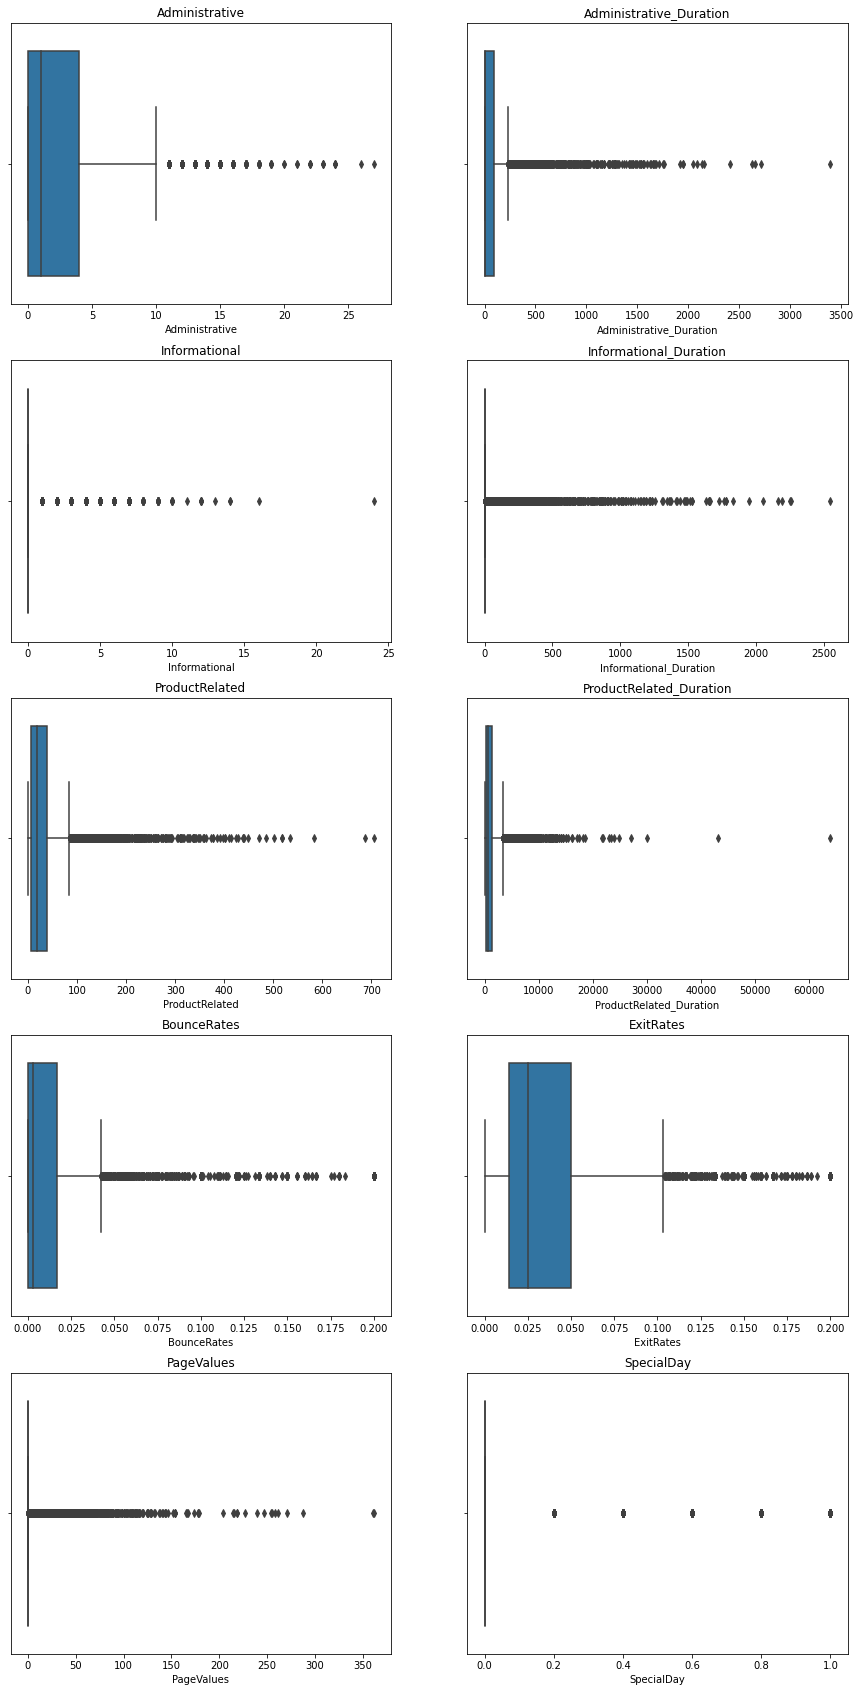

In [ ]:
# Plotting box-plots to gain knowledge of the mean, highest value, lowest value and to view the outliers

count = 1
plt.figure(figsize= (15,30))
for i in num:
    plt.subplot(5,2, count)
    sns.boxplot(x = df[i])
    plt.title(i)
    count += 1
plt.show()

In [ ]:
# add info as to what we are doing here

q1_adm=np.quantile(df.Administrative,0.25)
q3_adm=np.quantile(df.Administrative,0.75)
iqr_adm=q3_adm-q1_adm
ll=q1_adm-(1.5*iqr_adm)
ul=q3_adm+(1.5*iqr_adm)
df_ad_out=df[(df.Administrative<ll) | (df.Administrative>ul)]
df_ad_out.shape


(404, 18)

Outliers in the data set are realistic therefore we are not removing them

Instead of removing outliers we are using Power Transformation to reduce the outliers.

A power transform will make the probability distribution of a variable more Gaussian.

This is often described as removing a skew in the distribution, although more generally is described as stabilizing the variance of the distribution.

In [ ]:
# Removing statistically insignificant variables

df.drop(['Region'], axis = 1, inplace=True)

# updating the numerical and catagorical column variables
numerical = df.select_dtypes(include=np.number)
categorical = df.select_dtypes(exclude=np.number)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


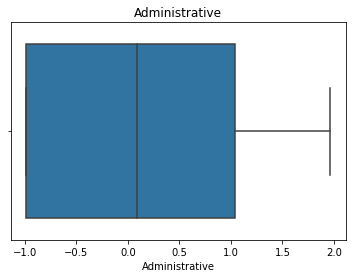

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


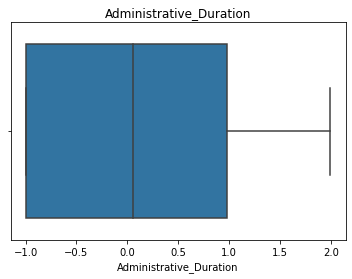

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


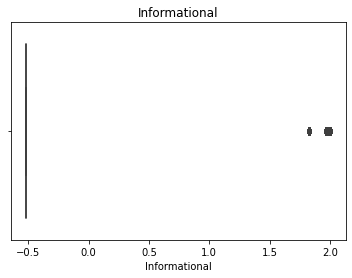

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


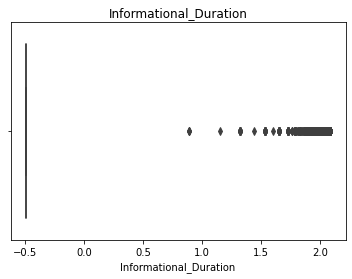

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


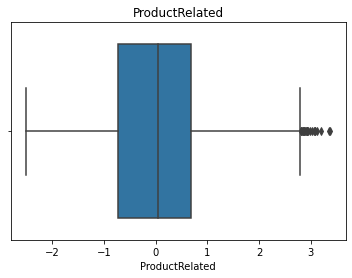

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


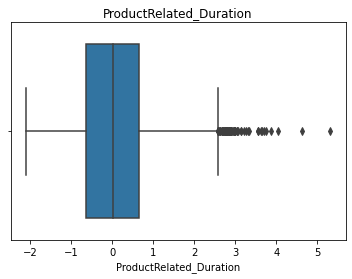

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


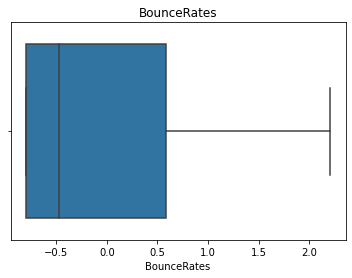

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


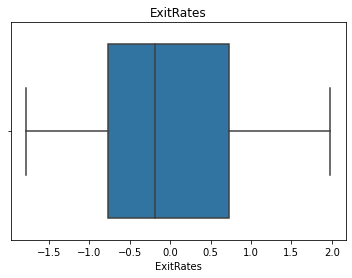

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


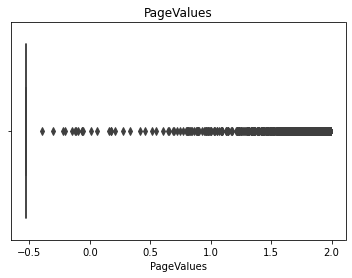

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


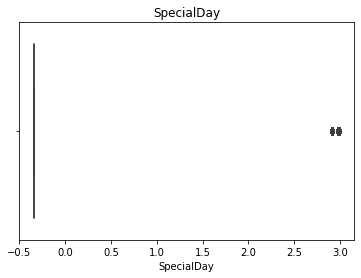

In [ ]:
# Viewing Box-Plots after performing power transformation

pt = PowerTransformer()
pt_numerical = pd.DataFrame(pt.fit_transform(numerical),columns=numerical.columns)

for i in pt_numerical.columns:
    sns.boxplot(pt_numerical[i])
    plt.title(i)
    plt.show()

#Testing and Training

In [ ]:
# DataFrame without Power Transformed Variables


sc = StandardScaler()
sc_numerical = pd.DataFrame(sc.fit_transform(numerical),columns=numerical.columns)


df2 = pd.concat([sc_numerical,categorical],axis=1)

df2['Weekend'].replace({False:0,True:1},inplace =True)
df2['Revenue'].replace({False:0,True:1},inplace =True)
df2 = df2.dropna(axis = 0)
df2.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,TrafficType,VisitorType,Weekend,Revenue
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,Feb,1,1,1,Returning_Visitor,0,0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,Feb,2,2,2,Returning_Visitor,0,0
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,Feb,4,1,3,Returning_Visitor,0,0
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,Feb,3,2,4,Returning_Visitor,0,0
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,Feb,3,3,4,Returning_Visitor,1,0


In [ ]:
# One-Hot Encoding and dummy variables

df3 = pd.get_dummies(df2,drop_first=True)
df3.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Revenue,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12330 entries, 0 to 12329
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  float64
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  float64
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  float64
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  Weekend                        12330 non-null  int64  
 11  Revenue                        12330 non-null  int64  
 12  Month_Dec                      12330 non-null 

## Applying Base Model

In [ ]:
# Splitting dependent and independent variables (columns)

y = df3['Revenue']
x = df3.drop('Revenue',1)

# Shape of x and y

print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)



Shape of x:  (12330, 60)
Shape of y:  (12330,)


In [ ]:
# Splitting Data into train and test

xtrain_wo, xtest_wo, ytrain_wo, ytest_wo = train_test_split(x,y,test_size=0.3,random_state = 2)

print("Shape of x train :", xtrain_wo.shape)
print("Shape of y train :", ytrain_wo.shape)
print("Shape of x test :", xtest_wo.shape)
print("Shape of y test :", ytest_wo.shape)

Shape of x train : (8631, 60)
Shape of y train : (8631,)
Shape of x test : (3699, 60)
Shape of y test : (3699,)


Models used in this project:

*   Logistic Regression is a supervised learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability.

*   The Decision Tree Algorithm belongs to the family of supervised machine learning algorithms. It can be used for both a classification problem as well as for regression problem.The goal of this algorithm is to create a model that predicts the value of a target variable, for which the decision tree uses the tree representation to solve the problem in which the leaf node corresponds to a class label and attributes are represented on the internal node of the tree.

*   Random Forest is a supervised learning algorithm which is used for both classification as well as regression. Random Forest Algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting. It is an ensemble method which is better than a single decision tree because it reduces the over-fitting
by averaging the result.

*   The K-Nearest Neighbours (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems. It's easy to implement and understand, but has a major drawback of becoming significantly slows as the size of that data in use grows.

*   XG Boost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.)








##Base Model Without Transformation

### Logistic Regression

In [ ]:
# Creation of Model
logistic_reg = LogisticRegression(solver = 'liblinear') 
# Training the Model
logistic_reg = logistic_reg.fit(xtrain_wo, ytrain_wo)
# Testing the Model
pred_logReg = logistic_reg.predict(xtest_wo)

# Printing the train and test score
print("test",(logistic_reg.score(xtest_wo,ytest_wo)))
print("train",(logistic_reg.score(xtrain_wo,ytrain_wo)))
print('\nReport:\n',classification_report(ytest_wo,pred_logReg))

test 0.8902406055690727
train 0.884022708840227

Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.94      3170
           1       0.72      0.39      0.50       529

    accuracy                           0.89      3699
   macro avg       0.81      0.68      0.72      3699
weighted avg       0.88      0.89      0.88      3699



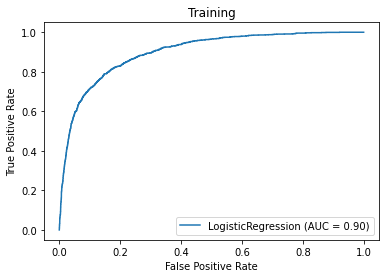

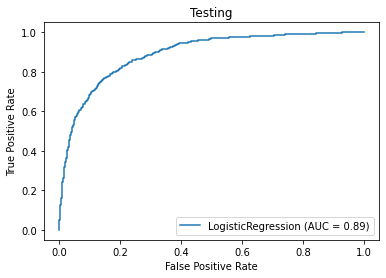

In [ ]:
fpr,tpr,thresh=roc_curve(ytest_wo,pred_logReg)
auc_log=auc(fpr,tpr)
plot_roc_curve(logistic_reg ,xtrain_wo,ytrain_wo)
plt.title('Training')
plt.show()

plot_roc_curve(logistic_reg ,xtest_wo,ytest_wo)
plt.title('Testing')

plt.show()


### Decision Trees

Hyper Tuning

In [ ]:
# Hyper parameter tuning for Decision Tree classifier using Grid Search CV. 
# It is important to restrict the depth of decision trees otherwise it will overfit.

dt1 = DecisionTreeClassifier()
params1 = {'max_depth':np.arange(1,11),'criterion':['gini','entropy']}
gsv1 = GridSearchCV(dt1,params1,cv=5,scoring='roc_auc')
gsv1.fit(xtrain_wo,ytrain_wo)
gsv1.best_params_

{'criterion': 'entropy', 'max_depth': 4}

Model

In [ ]:
# Creation of Model
decision_Tree = DecisionTreeClassifier(max_depth=4,criterion='entropy',random_state=0)
# Training the Model
decision_Tree = decision_Tree.fit(xtrain_wo, ytrain_wo)
# Testing the Model
pred_deciTree = decision_Tree.predict(xtest_wo)

# Printing the train and test score
print("test",(decision_Tree.score(xtest_wo,ytest_wo)))
print("train",(decision_Tree.score(xtrain_wo,ytrain_wo)))
print('\nReport:\n',classification_report(ytest_wo,pred_deciTree))



test 0.9013246823465801
train 0.9039508747537944

Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      3170
           1       0.68      0.59      0.63       529

    accuracy                           0.90      3699
   macro avg       0.81      0.77      0.79      3699
weighted avg       0.90      0.90      0.90      3699



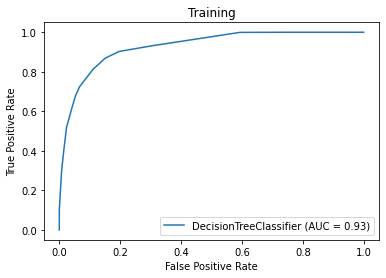

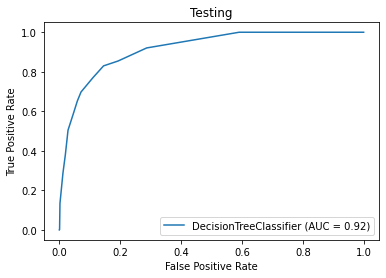

In [ ]:
fpr_DT,tpr_DT,thresh_DT=roc_curve(ytest_wo,pred_deciTree)
auc_log_DT=auc(fpr_DT,tpr_DT)

plot_roc_curve(decision_Tree ,xtrain_wo,ytrain_wo)
plt.title('Training')
plt.show()

plot_roc_curve(decision_Tree ,xtest_wo,ytest_wo)
plt.title('Testing')

plt.show()

###Random Forest

Hyper tuning

In [ ]:
# Customized grid search for n estimators of Random Forest (for getting the least variance error in scores)
from sklearn.model_selection import cross_val_score

ve1 = []

for i in range(1,101):
    rf1 = RandomForestClassifier(n_estimators=i,random_state=0)
    auc1 = cross_val_score(rf1,xtrain_wo,ytrain_wo,cv =5,scoring ='roc_auc')
    v1 = np.std(auc1,ddof=1)
    ve1.append(v1)
n_est1 = np.argmin(ve1)+1    

print('Lowest Variance Error for n_estimators:',n_est1)


Lowest Variance Error for n_estimators: 18


In [ ]:
# Tuning the hyperparameters other than n estimators using grid search CV

rf1 = RandomForestClassifier(n_estimators=18,random_state=0)
params1 = {'max_depth':np.arange(1,11),'criterion':['gini','entropy']}
gsv1 = GridSearchCV(rf1,params1,cv=5,scoring='roc_auc')
gsv1.fit(xtrain_wo,ytrain_wo)
gsv1.best_params_


{'criterion': 'entropy', 'max_depth': 9}

Model

In [ ]:
# Creation of Model
random_Forest = RandomForestClassifier(n_estimators=18,criterion='entropy',max_depth=9,random_state=0)

# Training the Model
random_Forest = random_Forest.fit(xtrain_wo, ytrain_wo)
# Testing the Model
pred_randFor = random_Forest.predict(xtest_wo)

# Printing the train and test score
print("test",(random_Forest.score(xtest_wo,ytest_wo)))
print("train",(random_Forest.score(xtrain_wo,ytrain_wo)))
print('\nReport:\n',classification_report(ytest_wo,pred_randFor))


test 0.9045688023790214
train 0.9253852392538524

Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      3170
           1       0.75      0.50      0.60       529

    accuracy                           0.90      3699
   macro avg       0.84      0.73      0.77      3699
weighted avg       0.90      0.90      0.90      3699



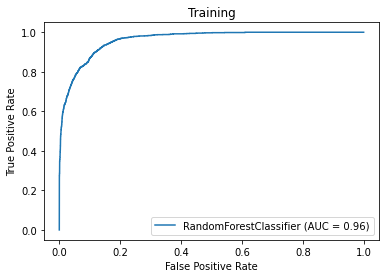

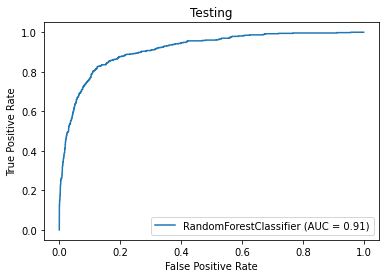

In [ ]:
fpr_RF,tpr_RF,thresh_RF=roc_curve(ytest_wo,pred_randFor)
auc_log_RF=auc(fpr_RF,tpr_RF)


plot_roc_curve(random_Forest ,xtrain_wo,ytrain_wo)
plt.title('Training')
plt.show()

plot_roc_curve(random_Forest ,xtest_wo,ytest_wo)
plt.title('Testing')

plt.show()

###KNN 

Hyper Tuning

In [ ]:
# Hyper parameter tuning for KNN using Grid Search CV
from sklearn.model_selection import GridSearchCV, KFold
knn1 = KNeighborsClassifier()
params1 = {'n_neighbors':np.arange(5,100),'weights':['uniform','distance']}
kf = KFold(n_splits=5,shuffle=True, random_state=4)
gsv = GridSearchCV(knn1,params1,cv=5,scoring='roc_auc')
gsv.fit(xtrain_wo,ytrain_wo)
gsv.best_params_


{'n_neighbors': 83, 'weights': 'distance'}

Model

In [ ]:
# Creation of Model
k_nn = KNeighborsClassifier(n_neighbors=83,weights='distance')
# Training the Model
k_nn = k_nn.fit(xtrain_wo, ytrain_wo)
# Testing the Model
pred_k_nn = k_nn.predict(xtest_wo)

# Printing the train and test score
print("test",(k_nn.score(xtest_wo,ytest_wo)))
print("train",(k_nn.score(xtrain_wo,ytrain_wo)))
print('\nReport:\n',classification_report(ytest_wo,pred_k_nn ))

test 0.8880778588807786
train 1.0

Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      3170
           1       0.77      0.31      0.44       529

    accuracy                           0.89      3699
   macro avg       0.83      0.65      0.69      3699
weighted avg       0.88      0.89      0.87      3699



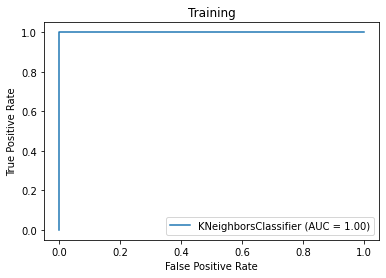

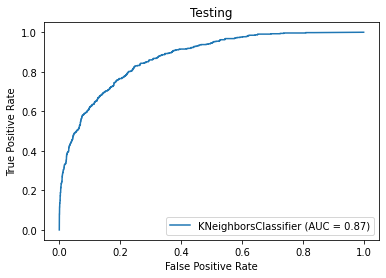

In [ ]:
fpr_k_nn,tpr_k_nn,thresh_k_nn=roc_curve(ytest_wo,pred_k_nn)
auc_log_k_nn=auc(fpr_k_nn,tpr_k_nn)

plot_roc_curve(k_nn ,xtrain_wo,ytrain_wo)
plt.title('Training')
plt.show()

plot_roc_curve(k_nn ,xtest_wo,ytest_wo)
plt.title('Testing')

plt.show()

###XG Boost

Hyper tuning

In [ ]:
# Tuning the XGBoost model for max depth & learning rate

tuned_xgb1 = XGBClassifier(random_state=2)
params1 = {'max_depth':np.arange(1,11),'learning_rate':[0.1,0.2,0.5,0.75]}
gsv = GridSearchCV(tuned_xgb1,params1,cv=5,scoring='roc_auc')
gsv.fit(xtrain_wo,ytrain_wo)
gsv.best_params_

#Best Estimators : {'learning_rate': 0.1, 'max_depth': 3}


{'learning_rate': 0.1, 'max_depth': 3}

Model

In [ ]:
# Creation of Model
xg_boost= XGBClassifier(max_depth=3,learning_rate=0.1,random_state=2)
# Training the Model
xg_boost = xg_boost.fit(xtrain_wo, ytrain_wo)
# Testing the Model
pred_xg = xg_boost.predict(xtest_wo)

# Printing the train and test score
print("test",(xg_boost.score(xtest_wo,ytest_wo)))
print("train",(xg_boost.score(xtrain_wo,ytrain_wo)))
print('\nReport:\n',classification_report(ytest_wo,pred_xg ))

test 0.9086239524195728
train 0.9161163248754489

Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      3170
           1       0.71      0.62      0.66       529

    accuracy                           0.91      3699
   macro avg       0.82      0.79      0.80      3699
weighted avg       0.90      0.91      0.91      3699



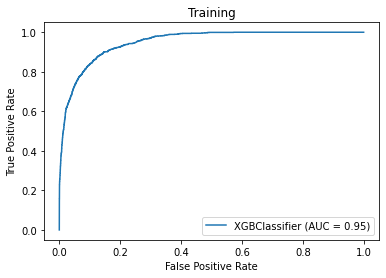

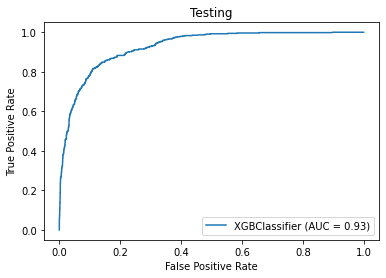

In [ ]:
fpr_xg,tpr_xg,thresh_xg=roc_curve(ytest_wo,pred_xg)
auc_log_xg=auc(fpr_xg,tpr_xg)

plot_roc_curve(xg_boost ,xtrain_wo,ytrain_wo)
plt.title('Training')
plt.show()

plot_roc_curve(xg_boost ,xtest_wo,ytest_wo)
plt.title('Testing')

plt.show()

###Combined Auc

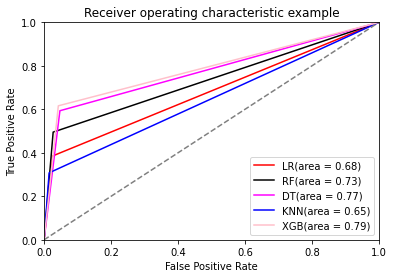

In [ ]:
plt.plot(fpr,tpr, label='LR(area = %0.2f)' % auc_log,color='red')
plt.plot(fpr_RF, tpr_RF, label='RF(area = %0.2f)' % auc_log_RF,color='black')
plt.plot(fpr_DT, tpr_DT, label='DT(area = %0.2f)' % auc_log_DT,color='magenta')
plt.plot(fpr_k_nn, tpr_k_nn, label='KNN(area = %0.2f)' % auc_log_k_nn,color='blue')
plt.plot(fpr_xg, tpr_xg, label='XGB(area = %0.2f)' % auc_log_xg,color='pink')


plt.plot([0, 1], [0, 1], 'k--',color='grey')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Base Model With Transformation

Many machine learning algorithms perform better when the distribution of variables is Gaussian.

We apply power transformation featurewise to make data more Gaussian-like.

Data sometimes may not have a Gaussian distribution and instead may have a Gaussian-like distribution (e.g. nearly Gaussian but with outliers or a skew) or a totally different distribution (e.g. exponential).

As such, we may be able to achieve better performance on a wide range of machine learning algorithms by transforming input and/or output variables to have a Gaussian or more-Gaussian distribution. 

Power transforms like the Box-Cox transform and the Yeo-Johnson transform provide an automatic way of performing these transforms on your data and are provided in the scikit-learn Python machine learning library.



In [ ]:
# DataFrame with PowerTrasformation

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt_numerical = pd.DataFrame(pt.fit_transform(numerical),columns=numerical.columns)

pt_df = pd.concat([pt_numerical,categorical],axis=1)


# numerically encoding Weekend and Revenue

pt_df['Weekend'].replace({False:0,True:1},inplace =True)
pt_df['Revenue'].replace({False:0,True:1},inplace =True)
pt_df = pt_df.dropna(axis = 0)
pt_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,TrafficType,VisitorType,Weekend,Revenue
0,-0.990128,-0.996659,-0.520489,-0.491697,-1.922123,-2.096783,2.206432,1.982547,-0.529409,-0.33602,Feb,1,1,1,Returning_Visitor,0,0
1,-0.990128,-0.996659,-0.520489,-0.491697,-1.574524,-1.074189,-0.799209,1.569866,-0.529409,-0.33602,Feb,2,2,2,Returning_Visitor,0,0
2,-0.990128,-0.996659,-0.520489,-0.491697,-1.922123,-2.096783,2.206432,1.982547,-0.529409,-0.33602,Feb,4,1,3,Returning_Visitor,0,0
3,-0.990128,-0.996659,-0.520489,-0.491697,-1.574524,-1.875436,1.709303,1.832073,-0.529409,-0.33602,Feb,3,2,4,Returning_Visitor,0,0
4,-0.990128,-0.996659,-0.520489,-0.491697,-0.442610,0.057515,0.756734,0.722460,-0.529409,-0.33602,Feb,3,3,4,Returning_Visitor,1,0


In [ ]:
pt_df = pd.get_dummies(pt_df,drop_first=True)
pt_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Revenue,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.990128,-0.996659,-0.520489,-0.491697,-1.922123,-2.096783,2.206432,1.982547,-0.529409,-0.33602,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,-0.990128,-0.996659,-0.520489,-0.491697,-1.574524,-1.074189,-0.799209,1.569866,-0.529409,-0.33602,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-0.990128,-0.996659,-0.520489,-0.491697,-1.922123,-2.096783,2.206432,1.982547,-0.529409,-0.33602,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,-0.990128,-0.996659,-0.520489,-0.491697,-1.574524,-1.875436,1.709303,1.832073,-0.529409,-0.33602,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,-0.990128,-0.996659,-0.520489,-0.491697,-0.442610,0.057515,0.756734,0.722460,-0.529409,-0.33602,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
pt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12330 entries, 0 to 12329
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  float64
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  float64
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  float64
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  Weekend                        12330 non-null  int64  
 11  Revenue                        12330 non-null  int64  
 12  Month_Dec                      12330 non-null 

In [ ]:
# Splitting dependent and independent variables (columns)

y_w = pt_df['Revenue']
x_w = pt_df.drop('Revenue',1)

# Shape of x and y

print("Shape of x: ", x_w.shape)
print("Shape of y: ", y_w.shape)



Shape of x:  (12330, 60)
Shape of y:  (12330,)


In [ ]:
# Splitting Data

from sklearn.model_selection import train_test_split

xtrain_w, xtest_w, ytrain_w, ytest_w = train_test_split(x_w,y_w,test_size=0.3,random_state = 2)

print("Shape of x train :", xtrain_w.shape)
print("Shape of y train :", ytrain_w.shape)
print("Shape of x test :", xtest_w.shape)
print("Shape of y test :", ytest_w.shape)

Shape of x train : (8631, 60)
Shape of y train : (8631,)
Shape of x test : (3699, 60)
Shape of y test : (3699,)


###Logistic regression

In [ ]:
# Creation of Model
logistic_reg_w = LogisticRegression(solver = 'liblinear') 
# Training the Model
logistic_reg_w = logistic_reg_w.fit(xtrain_w, ytrain_w)
# Testing the Model
pred_logReg_w = logistic_reg_w.predict(xtest_w)

# Printing the train and test score
print("test",(logistic_reg_w.score(xtest_w,ytest_w)))
print("train",(logistic_reg_w.score(xtrain_w,ytrain_w)))
print('\nReport:\n',classification_report(ytest_w,pred_logReg_w))

test 0.8983509056501757
train 0.8989688332754027

Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      3170
           1       0.66      0.60      0.63       529

    accuracy                           0.90      3699
   macro avg       0.80      0.78      0.79      3699
weighted avg       0.90      0.90      0.90      3699



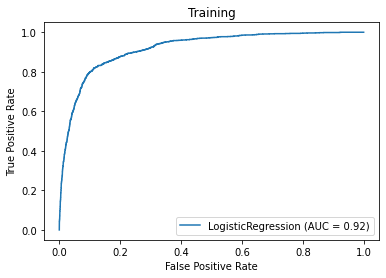

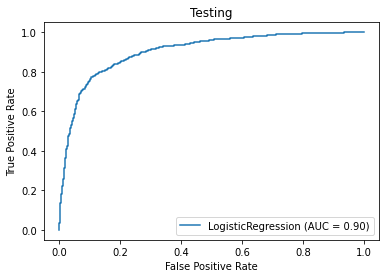

In [ ]:
fpr_w,tpr_w,thresh=roc_curve(ytest_w,pred_logReg)
auc_log_w=auc(fpr_w,tpr_w)
plot_roc_curve(logistic_reg_w ,xtrain_w,ytrain_w)
plt.title('Training')
plt.show()

plot_roc_curve(logistic_reg_w ,xtest_w,ytest_w)
plt.title('Testing')

plt.show()

###Decision trees

Hyper tuning

In [ ]:
# Hyper parameter tuning for Decision Tree classifier using Grid Search CV. 
# It is important to restrict the depth of decision trees otherwise it will overfit.

dt = DecisionTreeClassifier()
params = {'max_depth':np.arange(1,11),'criterion':['gini','entropy']}
gsv = GridSearchCV(dt,params,cv=5,scoring='roc_auc')
gsv.fit(xtrain_w,ytrain_w)
gsv.best_params_

{'criterion': 'entropy', 'max_depth': 4}

Model

In [ ]:
# Creation of Model
decision_Tree_w = DecisionTreeClassifier(max_depth=4,criterion='entropy',random_state=0)
# Training the Model
decision_Tree_w = decision_Tree_w.fit(xtrain_w, ytrain_w)
# Testing the Model
pred_deciTree_w = decision_Tree_w.predict(xtest_w)

# Printing the train and test score
print("test",(decision_Tree_w.score(xtest_w,ytest_w)))
print("train",(decision_Tree_w.score(xtrain_w,ytrain_w)))
print('\nReport:\n',classification_report(ytest_w,pred_deciTree_w))



test 0.9013246823465801
train 0.9039508747537944

Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      3170
           1       0.68      0.59      0.63       529

    accuracy                           0.90      3699
   macro avg       0.81      0.77      0.79      3699
weighted avg       0.90      0.90      0.90      3699



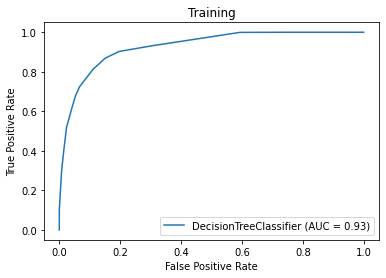

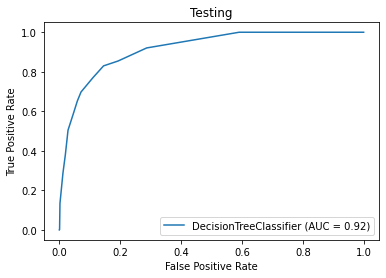

In [ ]:
fpr_DT_w,tpr_DT_w,thresh_DT_w=roc_curve(ytest_w,pred_deciTree_w)
auc_log_DT_w=auc(fpr_DT_w,tpr_DT_w)

plot_roc_curve(decision_Tree_w ,xtrain_w,ytrain_w)
plt.title('Training')
plt.show()

plot_roc_curve(decision_Tree_w ,xtest_w,ytest_w)
plt.title('Testing')

plt.show()

###Random forest

Hyper tuning

In [ ]:
# Customized grid search for n estimators of Random Forest (for getting the least variance error in scores)
from sklearn.model_selection import cross_val_score

ve = []

for i in range(1,101):
    rf = RandomForestClassifier(n_estimators=i,random_state=0)
    au = cross_val_score(rf,xtrain_w,ytrain_w,cv =5,scoring ='roc_auc')
    v = np.std(au,ddof=1)
    ve.append(v)
n_est = np.argmin(ve)+1    

print('Lowest Variance Error for n_estimators:',n_est)

Lowest Variance Error for n_estimators: 17


In [ ]:
# Tuning the hyperparameters other than n estimators using grid search CV

rf = RandomForestClassifier(n_estimators=17,random_state=0)
params = {'max_depth':np.arange(1,11),'criterion':['gini','entropy']}
gsv = GridSearchCV(rf,params,cv=5,scoring='roc_auc')
gsv.fit(xtrain_w,ytrain_w)
gsv.best_params_

{'criterion': 'entropy', 'max_depth': 9}

Model

In [ ]:
# Creation of Model
random_Forest_w = RandomForestClassifier(n_estimators=17,criterion='entropy',max_depth=9,random_state=0)
# Training the Model
random_Forest_w = random_Forest_w.fit(xtrain_w, ytrain_w)
# Testing the Model
pred_randFor_w = random_Forest_w.predict(xtest_w)

# Printing the train and test score
print("test",(random_Forest_w.score(xtest_w,ytest_w)))
print("train",(random_Forest_w.score(xtrain_w,ytrain_w)))
print('\nReport:\n',classification_report(ytest_w,pred_randFor_w))


test 0.9029467423628007
train 0.9253852392538524

Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      3170
           1       0.74      0.50      0.59       529

    accuracy                           0.90      3699
   macro avg       0.83      0.73      0.77      3699
weighted avg       0.89      0.90      0.89      3699



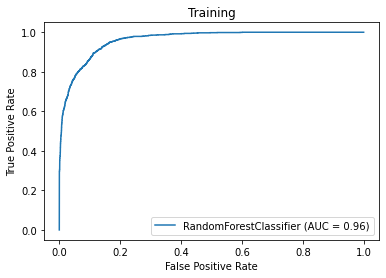

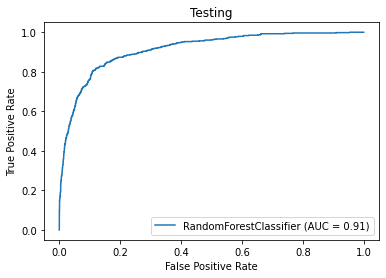

In [ ]:
fpr_RF_w,tpr_RF_w,thresh_RF_w=roc_curve(ytest_w,pred_randFor)
auc_log_RF_w=auc(fpr_RF_w,tpr_RF_w)

plot_roc_curve(random_Forest_w ,xtrain_w,ytrain_w)
plt.title('Training')
plt.show()

plot_roc_curve(random_Forest_w ,xtest_w,ytest_w)
plt.title('Testing')

plt.show()


###KNN

Hyper Tuning

In [ ]:
# Hyper parameter tuning for KNN using Grid Search CV
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
params = {'n_neighbors':np.arange(5,100),'weights':['uniform','distance']}
#kf = KFold(n_splits=5,shuffle=True, random_state=4)
gsv = GridSearchCV(knn,params,cv=5,scoring='roc_auc')
gsv.fit(xtrain_w,ytrain_w)
gsv.best_params_

Model

In [ ]:
# Creation of Model
k_nn_w = KNeighborsClassifier(n_neighbors=83,weights='distance')
# Training the Model
k_nn_w = k_nn_w.fit(xtrain_w, ytrain_w)
# Testing the Model
pred_k_nn_w = k_nn_w.predict(xtest_w)

# Printing the train and test score
print("test",(k_nn_w.score(xtest_w,ytest_w)))
print("train",(k_nn_w.score(xtrain_w,ytrain_w)))
print('\nReport:\n',classification_report(ytest_w,pred_k_nn_w ))

test 0.8967288456339552
train 1.0

Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      3170
           1       0.66      0.57      0.61       529

    accuracy                           0.90      3699
   macro avg       0.79      0.76      0.78      3699
weighted avg       0.89      0.90      0.89      3699



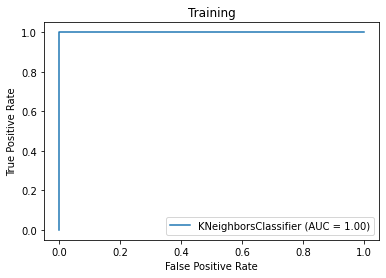

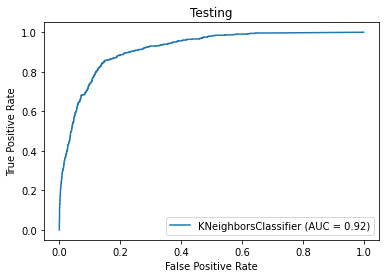

In [ ]:
fpr_k_nn_w,tpr_k_nn_w,thresh_k_nn_w=roc_curve(ytest_w,pred_k_nn_w)
auc_log_k_nn_w=auc(fpr_k_nn_w,tpr_k_nn_w)

plot_roc_curve(k_nn_w ,xtrain_w,ytrain_w)
plt.title('Training')
plt.show()

plot_roc_curve(k_nn_w ,xtest_w,ytest_w)
plt.title('Testing')

plt.show()

###XG Boost

Hyper Tuning

In [ ]:
# Tuning the XGBoost model for max depth & learning rate

tuned_xgb = XGBClassifier(random_state=2)
params = {'max_depth':np.arange(1,11),'learning_rate':[0.1,0.2,0.5,0.75]}
gsv = GridSearchCV(tuned_xgb,params,cv=5,scoring='roc_auc')
gsv.fit(xtrain_w,ytrain_w)
gsv.best_params_

#Best Estimators : {'learning_rate': 0.1, 'max_depth': 3}

Model

In [ ]:
# Creation of Model
xg_boost_w= XGBClassifier(max_depth=3,learning_rate=0.1,random_state=2)
# Training the Model
xg_boost_w = xg_boost_w.fit(xtrain_w, ytrain_w)
# Testing the Model
pred_xg_w = xg_boost_w.predict(xtest_w)

# Printing the train and test score
print("test",(xg_boost_w.score(xtest_w,ytest_w)))
print("train",(xg_boost_w.score(xtrain_w,ytrain_w)))
print('\nReport:\n',classification_report(ytest_w,pred_xg_w ))

test 0.9086239524195728
train 0.9161163248754489

Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      3170
           1       0.71      0.62      0.66       529

    accuracy                           0.91      3699
   macro avg       0.82      0.79      0.80      3699
weighted avg       0.90      0.91      0.91      3699



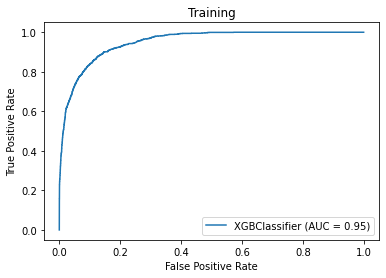

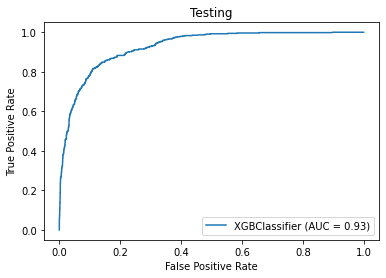

In [ ]:
fpr_xg_w,tpr_xg_w,thresh_xg_w=roc_curve(ytest_w,pred_xg_w)
auc_log_xg_w=auc(fpr_xg_w,tpr_xg_w)

plot_roc_curve(xg_boost_w ,xtrain_w,ytrain_w)
plt.title('Training')
plt.show()

plot_roc_curve(xg_boost_w ,xtest_w,ytest_w)
plt.title('Testing')

plt.show()

###Combined AUC

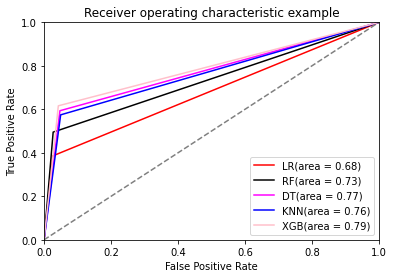

In [ ]:
plt.plot(fpr_w,tpr_w, label='LR(area = %0.2f)' % auc_log_w,color='red')
plt.plot(fpr_RF_w, tpr_RF_w, label='RF(area = %0.2f)' % auc_log_RF_w,color='black')
plt.plot(fpr_DT_w, tpr_DT_w, label='DT(area = %0.2f)' % auc_log_DT_w,color='magenta')
plt.plot(fpr_k_nn_w, tpr_k_nn_w, label='KNN(area = %0.2f)' % auc_log_k_nn_w,color='blue')
plt.plot(fpr_xg_w, tpr_xg_w, label='XGB(area = %0.2f)' % auc_log_xg_w,color='pink')



plt.plot([0, 1], [0, 1], 'k--',color='grey')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


###Feature selection XG Boost

In [ ]:
from sklearn.feature_selection import RFECV

rfe = RFECV(xg_boost_w,cv=3,scoring = 'roc_auc')
rfe.fit(xtrain_w,ytrain_w)

RFECV(cv=3,
      estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, learning_rate=0.1,
                              max_delta_step=0, max_depth=3, min_child_weight=1,
                              missing=None, n_estimators=100, n_jobs=1,
                              nthread=None, objective='binary:logistic',
                              random_state=2, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, seed=None, silent=None,
                              subsample=1, verbosity=1),
      min_features_to_select=1, n_jobs=None, scoring='roc_auc', step=1,
      verbose=0)

In [ ]:
rfe_df = pd.DataFrame(list(xtrain_w),columns=['Feature'])
rfe_df['Rank'] = rfe.ranking_
best_features = rfe_df[rfe_df['Rank'] == 1]['Feature'].values
print('Best Features selected :')
print(best_features)

Best Features selected :
['Administrative' 'BounceRates' 'ExitRates' 'PageValues' 'Month_Mar'
 'Month_May' 'Month_Nov' 'Month_Sep' 'VisitorType_Returning_Visitor']


In [ ]:
from sklearn.model_selection import cross_val_score

xtrain_rfe = xtrain_w[best_features]

ve = []
be = []
aucd = cross_val_score(xg_boost_w,xtrain_rfe,ytrain_w,cv =5,scoring ='roc_auc')
v = np.std(aucd,ddof=1)
ve.append(v)
b = np.mean(1-aucd)
be.append(b)

In [ ]:
# pt_df
x_w_fs=pt_df[best_features]
x_w_fs.head()

,Administrative,BounceRates,ExitRates,PageValues,Month_Mar,Month_May,Month_Nov,Month_Sep,VisitorType_Returning_Visitor
0,-0.990128,2.206432,1.982547,-0.529409,0,0,0,0,1
1,-0.990128,-0.799209,1.569866,-0.529409,0,0,0,0,1
2,-0.990128,2.206432,1.982547,-0.529409,0,0,0,0,1
3,-0.990128,1.709303,1.832073,-0.529409,0,0,0,0,1
4,-0.990128,0.756734,0.722460,-0.529409,0,0,0,0,1


In [ ]:
x_w_fs['Revenue'] = y_w
x_w_fs.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Administrative,BounceRates,ExitRates,PageValues,Month_Mar,Month_May,Month_Nov,Month_Sep,VisitorType_Returning_Visitor,Revenue
0,-0.990128,2.206432,1.982547,-0.529409,0,0,0,0,1,0
1,-0.990128,-0.799209,1.569866,-0.529409,0,0,0,0,1,0
2,-0.990128,2.206432,1.982547,-0.529409,0,0,0,0,1,0
3,-0.990128,1.709303,1.832073,-0.529409,0,0,0,0,1,0
4,-0.990128,0.756734,0.722460,-0.529409,0,0,0,0,1,0


Hyper tuning

In [ ]:
y_fs = x_w_fs['Revenue']
x_fs = x_w_fs.drop('Revenue',1)

# Shape of x and y

print("Shape of x: ", x_fs.shape)
print("Shape of y: ", y_fs.shape)


Shape of x:  (12330, 9)
Shape of y:  (12330,)


In [ ]:
xtrain_wfs, xtest_wfs, ytrain_wfs, ytest_wfs = train_test_split(x_fs,y_fs,test_size=0.3,random_state = 2)

print("Shape of x train :", xtrain_wfs.shape)
print("Shape of y train :", ytrain_wfs.shape)
print("Shape of x test :", xtest_wfs.shape)
print("Shape of y test :", ytest_wfs.shape)


Shape of x train : (8631, 9)
Shape of y train : (8631,)
Shape of x test : (3699, 9)
Shape of y test : (3699,)


Model

In [ ]:
# Tuning the XGBoost model for max depth & learning rate

tuned_xgb = XGBClassifier(random_state=2)
params = {'max_depth':np.arange(1,11),'learning_rate':[0.1,0.2,0.5,0.75]}
gsv = GridSearchCV(tuned_xgb,params,cv=5,scoring='roc_auc')
gsv.fit(xtrain_wfs,ytrain_wfs)
gsv.best_params_

#Best Estimators : {'learning_rate': 0.1, 'max_depth': 3}

{'learning_rate': 0.1, 'max_depth': 3}

In [ ]:
# Creation of Model
fs_xg_boost_w= XGBClassifier(max_depth=3,learning_rate=0.1,random_state=2)
# Training the Model
fs_xg_boost_w = fs_xg_boost_w.fit(xtrain_wfs, ytrain_wfs)
# Testing the Model
fs_pred_xg_w = fs_xg_boost_w.predict(xtest_wfs)

# Printing the train and test score
print("test",(fs_xg_boost_w.score(xtest_wfs,ytest_wfs)))
print("train",(fs_xg_boost_w.score(xtrain_wfs,ytrain_wfs)))
print('\nReport:\n',classification_report(ytest_wfs,fs_pred_xg_w ))

test 0.9053798323871317
train 0.913683234851118

Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      3170
           1       0.69      0.61      0.65       529

    accuracy                           0.91      3699
   macro avg       0.81      0.78      0.80      3699
weighted avg       0.90      0.91      0.90      3699



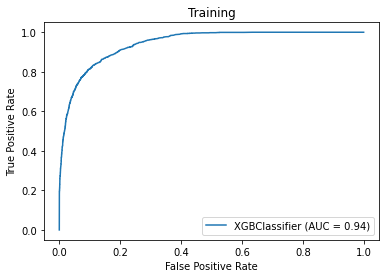

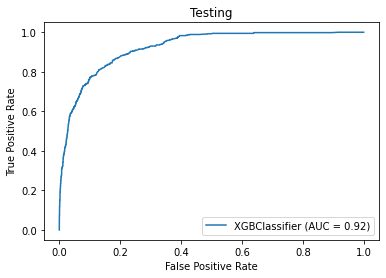

In [ ]:
fs_fpr_xg_w,fs_tpr_xg_w,fs_thresh_xg_w=roc_curve(ytest_wfs,fs_pred_xg_w)
fs_auc_log_xg_w=auc(fs_fpr_xg_w,fs_tpr_xg_w)
# auc1 = auc(fs_fpr_xg_w,fs_tpr_xg_w)


plot_roc_curve(fs_xg_boost_w ,xtrain_wfs,ytrain_wfs)
plt.title('Training')
plt.show()

plot_roc_curve(fs_xg_boost_w ,xtest_wfs,ytest_wfs)
plt.title('Testing')

plt.show()

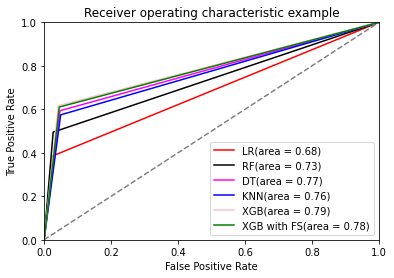

In [ ]:
plt.plot(fpr_w,tpr_w, label='LR(area = %0.2f)' % auc_log_w,color='red')
plt.plot(fpr_RF_w, tpr_RF_w, label='RF(area = %0.2f)' % auc_log_RF_w,color='black')
plt.plot(fpr_DT_w, tpr_DT_w, label='DT(area = %0.2f)' % auc_log_DT_w,color='magenta')
plt.plot(fpr_k_nn_w, tpr_k_nn_w, label='KNN(area = %0.2f)' % auc_log_k_nn_w,color='blue')
plt.plot(fpr_xg_w, tpr_xg_w, label='XGB(area = %0.2f)' % auc_log_xg_w,color='pink')
plt.plot(fs_fpr_xg_w, fs_tpr_xg_w, label='XGB with FS(area = %0.2f)' % fs_auc_log_xg_w ,color='green')


plt.plot([0, 1], [0, 1], 'k--',color='grey')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


###Feature Selection (Random Forest)

In [ ]:
from sklearn.feature_selection import RFECV

rfe2 = RFECV(random_Forest_w,cv=3,scoring = 'roc_auc')
rfe2.fit(xtrain_w,ytrain_w)

RFECV(cv=3,
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='entropy',
                                       max_depth=9, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=17, n_jobs=None,
                                       oob_score=False, random_state=0,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='roc_auc', step=1,
      verbose=0)

In [ ]:
rfe_df2 = pd.DataFrame(list(xtrain_w),columns=['Feature'])
rfe_df2['Rank'] = rfe2.ranking_
best_features2 = rfe_df2[rfe_df2['Rank'] == 1]['Feature'].values
print('Best Features selected :')
print(best_features2)

Best Features selected :
['Administrative' 'Administrative_Duration' 'Informational'
 'Informational_Duration' 'ProductRelated' 'ProductRelated_Duration'
 'BounceRates' 'ExitRates' 'PageValues' 'Month_Mar' 'Month_May'
 'Month_Nov' 'VisitorType_Returning_Visitor']


In [ ]:
xtrain_rfe2 = xtrain_w[best_features]

ve2 = []
be2 = []
aucd2 = cross_val_score(random_Forest_w,xtrain_rfe2,ytrain_w,cv =5,scoring ='roc_auc')
v2 = np.std(aucd2,ddof=1)
ve2.append(v2)
b2 = np.mean(1-aucd2)
be2.append(b2)

In [ ]:
newdf2=pt_df[best_features2]
newdf2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month_Mar,Month_May,Month_Nov,VisitorType_Returning_Visitor
0,-0.990128,-0.996659,-0.520489,-0.491697,-1.922123,-2.096783,2.206432,1.982547,-0.529409,0,0,0,1
1,-0.990128,-0.996659,-0.520489,-0.491697,-1.574524,-1.074189,-0.799209,1.569866,-0.529409,0,0,0,1
2,-0.990128,-0.996659,-0.520489,-0.491697,-1.922123,-2.096783,2.206432,1.982547,-0.529409,0,0,0,1
3,-0.990128,-0.996659,-0.520489,-0.491697,-1.574524,-1.875436,1.709303,1.832073,-0.529409,0,0,0,1
4,-0.990128,-0.996659,-0.520489,-0.491697,-0.442610,0.057515,0.756734,0.722460,-0.529409,0,0,0,1


In [ ]:
xtrain_wfsRf, xtest_wfsRf, ytrain_wfsRf, ytest_wfsRf = train_test_split(newdf2,y_fs,test_size=0.3,random_state = 2)

print("Shape of x train :", xtrain_wfsRf.shape)
print("Shape of y train :", ytrain_wfsRf.shape)
print("Shape of x test :", xtest_wfsRf.shape)
print("Shape of y test :", ytest_wfsRf.shape)

Shape of x train : (8631, 13)
Shape of y train : (8631,)
Shape of x test : (3699, 13)
Shape of y test : (3699,)


Hyper tuning

In [ ]:
# Customized grid search for n estimators of Random Forest (for getting the least variance error in scores)
from sklearn.model_selection import cross_val_score

ve = []

for i in range(1,101):
    rf = RandomForestClassifier(n_estimators=i,random_state=0)
    au = cross_val_score(rf,xtrain_wfsRf,ytrain_wfsRf,cv =5,scoring ='roc_auc')
    v = np.std(au,ddof=1)
    ve.append(v)
n_est = np.argmin(ve)+1    

print('Lowest Variance Error for n_estimators:',n_est)

Lowest Variance Error for n_estimators: 4


In [ ]:
# Tuning the hyperparameters other than n estimators using grid search CV

rf = RandomForestClassifier(n_estimators=4,random_state=0)
params = {'max_depth':np.arange(1,11),'criterion':['gini','entropy']}
gsv = GridSearchCV(rf,params,cv=5,scoring='roc_auc')
gsv.fit(xtrain_w,ytrain_w)
gsv.best_params_

{'criterion': 'entropy', 'max_depth': 7}

Model

In [ ]:

# Creation of Model
random_Forest_wFs = RandomForestClassifier(n_estimators=17,criterion='entropy',max_depth=9,random_state=0)
# Training the Model
random_Forest_wFs = random_Forest_wFs.fit(xtrain_wfsRf, ytrain_wfsRf)
# Testing the Model
pred_randFor_wFs = random_Forest_wFs.predict(xtest_wfsRf)

# Printing the train and test score
print("test",(random_Forest_wFs.score(xtest_wfsRf,ytest_wfsRf)))
print("train",(random_Forest_wFs.score(xtrain_wfsRf,ytrain_wfsRf)))
print('\nReport:\n',classification_report(ytest_wfsRf,pred_randFor_wFs))



test 0.9070018924033523
train 0.932336925037655

Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      3170
           1       0.71      0.59      0.65       529

    accuracy                           0.91      3699
   macro avg       0.82      0.78      0.80      3699
weighted avg       0.90      0.91      0.90      3699



In [ ]:
fpr_RF_wFs,tpr_RF_wFs,thresh_RF_wFs=roc_curve(ytest_w,pred_randFor_wFs)
auc_log_RF_wFs=auc(fpr_RF_wFs,tpr_RF_wFs)

plot_roc_curve(random_Forest_wFs ,xtrain_wfsRf,ytrain_w)
plt.title('Training')
plt.show()

plot_roc_curve(random_Forest_wFs ,xtest_wfsRf,ytest_wfsRf)
plt.title('Testing')

plt.show()

In [ ]:
plt.plot(fpr_w,tpr_w, label='LR(area = %0.2f)' % auc_log_w,color='red')
plt.plot(fpr_RF_w, tpr_RF_w, label='RF(area = %0.2f)' % auc_log_RF_w,color='black')
plt.plot(fpr_DT_w, tpr_DT_w, label='DT(area = %0.2f)' % auc_log_DT_w,color='magenta')
plt.plot(fpr_k_nn_w, tpr_k_nn_w, label='KNN(area = %0.2f)' % auc_log_k_nn_w,color='blue')
plt.plot(fpr_xg_w, tpr_xg_w, label='XGB(area = %0.2f)' % auc_log_xg_w,color='pink')
plt.plot(fs_fpr_xg_w, fs_tpr_xg_w, label='XGB with FS(area = %0.2f)' % fs_auc_log_xg_w ,color='green')
plt.plot(fpr_RF_wFs, tpr_RF_wFs, label='RF with FS(area = %0.2f)' % auc_log_RF_wFs ,color='yellow')

plt.plot([0, 1], [0, 1], 'k--',color='grey')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


#Conclusion

In this project we have used 5 different machine learning techniques 

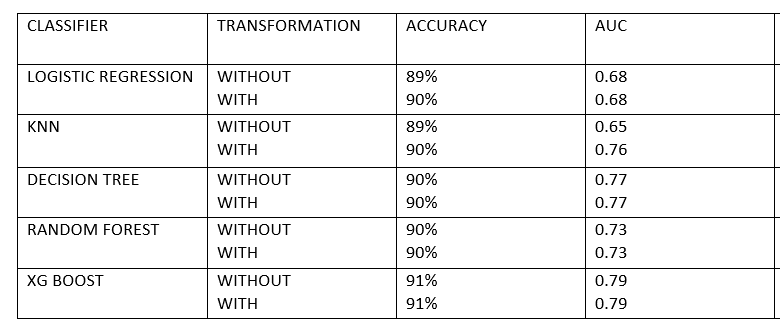

We are doing feature selection on XG Boost and Random Forest.

The accuracy of Random forest feature selection is 90% and the AUC is 0.77.

On the other hand the accuracy of XG Boost after feature selection is 91% and AUC is 0.78 . 




#Reference

In [ ]:
Dataset link  - https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset